In [1]:
#from breakthrough_A import *
from breakthrough import *

Version:  0.3.15


# Stages of training

- training stage == learning, changing # of skittles
- testing stage == fixed # of skittles, see how well it does
- epoch -- number of training games before testing


In [2]:
iteration_count=0
percentage_won_player1=[]
percentage_won_player2=[]
percentage_stalemate=[]
number_of_iterations=[]

In [3]:
agent1=Agent(skittles_move)
agent1.T=Table()  # starts off empty
agent1.post=skittles_after
agent1.learning=True

agent2=Agent(skittles_move)
agent2.T=Table()  # starts off empty
agent2.post=skittles_after
agent2.learning=True

- N=3  only 200 iterations
- 

In [4]:
epoch_number=2000  # play 200 games, learning, and then test
N_test=100  # play 100 games, fixed skittles, see how well it does
N_train=500  # play 500 epochs, learning, changing skittles

total_number_of_games=epoch_number*N_train
total_number_of_games

100000

In [5]:
from tqdm.notebook import tqdm
from IPython.display import display,clear_output

In [6]:
from matplotlib import pyplot as plt

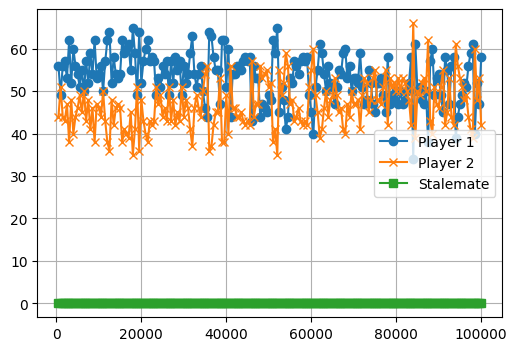

In [7]:
board_size=4

plt.close('all')
fig, ax = plt.subplots(figsize=(6, 4))
#plt.show(block=False)
try:
    for i in tqdm(range(epoch_number), desc="Updating plot", leave=True):
        # training step
        agent1.learning=True
        agent2.learning=True
    
        g=Game(number_of_games=N_train,N=board_size)
        g.display=False
        result=g.run(agent1,agent2)
    
        # testing step
        agent1.learning=False
        agent2.learning=False
    
        g=Game(number_of_games=N_test,N=board_size)
        g.display=False
        result=g.run(agent1,agent2)
    
        iteration_count+=N_train
    
    
        percentage_won_player1.append(result.count(1)/N_test*100)
        percentage_won_player2.append(result.count(2)/N_test*100)
        percentage_stalemate.append(result.count(0)/N_test*100)
        number_of_iterations.append(iteration_count)
    
        assert result.count(3)==0   # error on illegal games
    
        clear_output(wait=True)
        ax.cla()
        ax.grid(True)
        
        ax.plot(number_of_iterations,percentage_won_player1,'-o',label="Player 1")
        ax.plot(number_of_iterations,percentage_won_player2,'-x',label="Player 2")
        ax.plot(number_of_iterations,percentage_stalemate,'-s',label="Stalemate")
        ax.legend()
    
        fig.canvas.draw()
        fig.canvas.flush_events()
        plt.show()
        display(fig)
except KeyboardInterrupt:
    pass

# Q learning

In [14]:
agent1=Agent(Q_move)
agent1.post=Q_after
agent1.Q=Table()
agent1.learning=True

agent1.α=0.3  # learning rate
agent1.γ=0.9  # discount factor
agent1.ϵ=0.1  # random games sometimes for exploration

agent2=Agent(Q_move)
agent2.post=Q_after
agent2.Q=Table()
agent2.learning=True

agent2.α=0.3  # learning rate
agent2.γ=0.9  # discount factor
agent2.ϵ=0.1  # random games sometimes for exploration


In [15]:
iteration_count=0
percentage_won_player1=[]
percentage_won_player2=[]
percentage_stalemate=[]
number_of_iterations=[]

In [16]:
epoch_number=2000  # play 200 games, learning, and then test
N_test=100  # play 100 games, fixed skittles, see how well it does
N_train=500  # play 500 epochs, learning, changing skittles

total_number_of_games=epoch_number*N_train
total_number_of_games

1000000

In [17]:
from tqdm.notebook import tqdm
from IPython.display import display,clear_output

In [18]:
from matplotlib import pyplot as plt

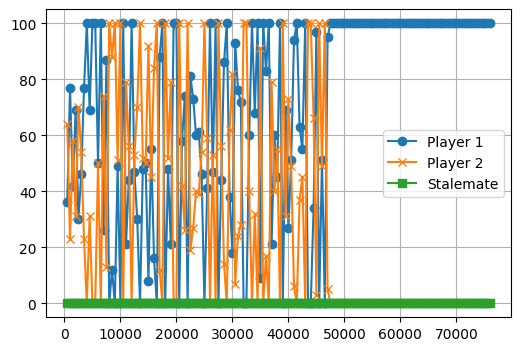

In [19]:
board_size=4

plt.close('all')
fig, ax = plt.subplots(figsize=(6, 4))
#plt.show(block=False)
try:
    
    for i in tqdm(range(epoch_number), desc="Updating plot", leave=True):
        # training step
        agent1.learning=True
        agent2.learning=True
    
        g=Game(number_of_games=N_train,N=board_size)
        g.display=False
        result=g.run(agent1,agent2)
    
        # testing step
        agent1.learning=False
        agent2.learning=False
    
        g=Game(number_of_games=N_test,N=board_size)
        g.display=False
        result=g.run(agent1,agent2)
    
        iteration_count+=N_train
    
    
        percentage_won_player1.append(result.count(1)/N_test*100)
        percentage_won_player2.append(result.count(2)/N_test*100)
        percentage_stalemate.append(result.count(0)/N_test*100)
        number_of_iterations.append(iteration_count)
    
        assert result.count(3)==0   # error on illegal games
    
        clear_output(wait=True)
        ax.cla()
        ax.grid(True)
        
        ax.plot(number_of_iterations,percentage_won_player1,'-o',label="Player 1")
        ax.plot(number_of_iterations,percentage_won_player2,'-x',label="Player 2")
        ax.plot(number_of_iterations,percentage_stalemate,'-s',label="Stalemate")
        ax.legend()
    
        fig.canvas.draw()
        fig.canvas.flush_events()
        plt.show()
        display(fig)

except KeyboardInterrupt:
    pass